In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [27]:
# Load dataset
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Histogram with a density curve

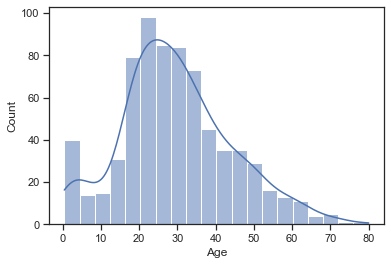

In [28]:
sns.histplot(df.Age, kde=True)
plt.show()

FacetGrid: If we wanted to break down a plot (e.g. the last one) by some categories, we needn’t perform boolean queries, nor groupbys, we can use FacetGrid.

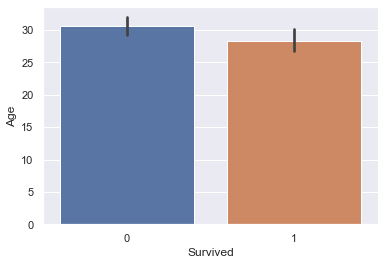

In [54]:
sns.barplot(x=df.Survived, y=df.Age)
plt.show()

### Line plot

<AxesSubplot:xlabel='Age', ylabel='Fare'>

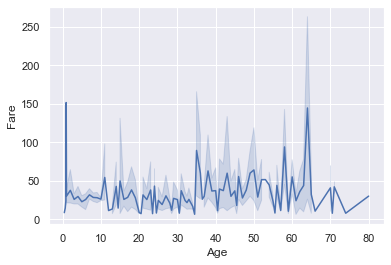

In [56]:
sns.lineplot(x=df.Age, y=df.Fare)

### Barchart Grid

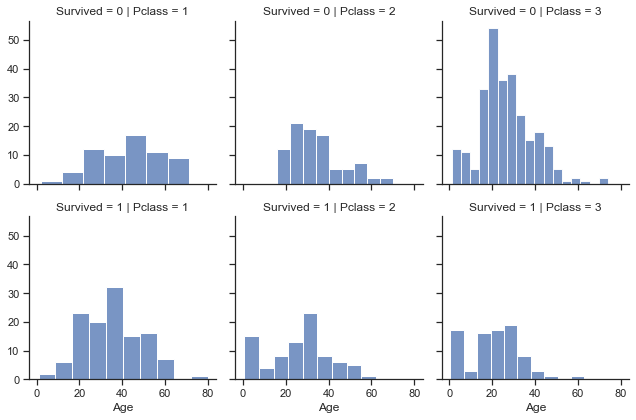

In [29]:
g = sns.FacetGrid(df, row='Survived', col='Pclass')
g.map(sns.histplot, "Age")
plt.show()

### Jointplot

This method is used to display data points according to two variables, along with both their distributions, kernel density estimators, and an optional regression that fits the data. With reg we indicate that we want a regression fit to the data.

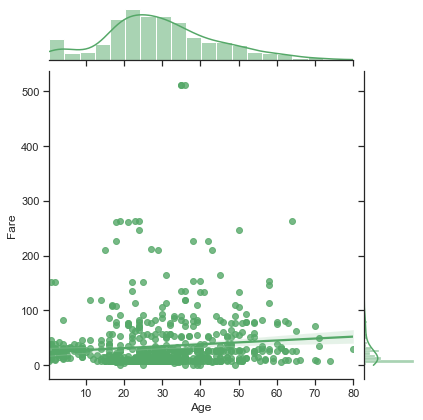

In [30]:
sns.jointplot(data=df, x='Age', y='Fare', kind='reg', color='g')
plt.show()

### Heatmap 

Heatmaps are ideal to plot “rectangular data” such as matrixes. They’re great to visualize when some values, or calculated values, such as averages, counts, etc. are more extreme.

In [31]:
table = pd.pivot_table(df, values='Fare', index='Pclass', columns=['SibSp'], aggfunc=np.sum, fill_value=0)
table

SibSp,0,1,2,3,4,5,8
Pclass,,,,,,,
1,10305.5998,6282.9335,799.8792,789.0000,0.0,0.0,0.00
2,1863.8792,1561.2125,355.7500,21.0000,0.0,0.0,0.00
3,3451.2740,1382.6544,293.4749,292.5418,573.4,234.5,486.85


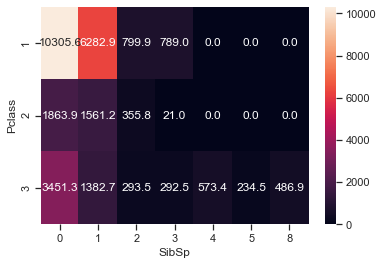

In [32]:
sns.heatmap(table, annot=True, fmt=".1f")
plt.show()

### Heatmap with correlations

Heatmap with a correlation matrix. Pandas DataFrame has a corr method that calculates Pearson’s (can be another) correlation coefficient between all couples of numeric columns of the DataFrame.

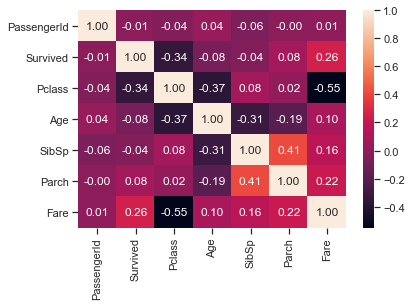

In [33]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

### Scatterplot with a linear regression model

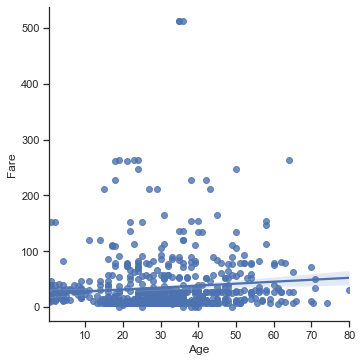

In [57]:
sns.set_theme(style="ticks")

# Show the results of a linear regression within each dataset
sns.lmplot(x="Age", y="Fare", data=df)


### Scatterplot

<AxesSubplot:xlabel='Age', ylabel='Fare'>

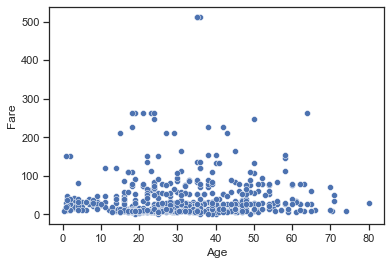

In [58]:
sns.scatterplot(x="Age", y="Fare", data=df)

### Bubble Chart

<AxesSubplot:xlabel='Age', ylabel='Fare'>

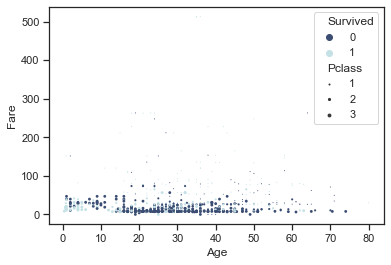

In [64]:
sns.scatterplot(x="Age", y="Fare",
                hue="Survived", size="Pclass",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=df)